### OSL(Ordinary Least Square) Task

##### 서울 자전거 대여 수 분석

- Date: 대여 날짜
- Rented Bike Count: 대여 수
- Hour: 대여 시간
- Temperature(°C): 온도(섭씨)
- Humidity(%): 습도 (%)
- Wind speed (m/s): 풍속 (m/s)
- Visibility (10m): 가시거리 (10m)
- Dew point temperature(°C): 이슬점(°C), 이슬점이 낮으면 10~15°C 정도로 공기가 편안하게 느껴진다.
- Solar Radiation (MJ/m2): 태양복사 (MJ/m2)
- Rainfall(mm): 강우량/비 (mm)
- Snowfall (cm): 강우량/눈 (cm)
- Seasons: 계절
- Holiday: 공휴일
- Functioning Day: 운영여부

In [1]:
import chardet

rawdata = open('./datasets/seoul_bicycle.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'ISO-8859-1'

In [2]:
import pandas as pd

bicycle_df = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')
bicycle_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
bicycle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
bicycle_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
bicycle_df.duplicated().sum()

0

In [6]:
bicycle_df.Date = pd.to_datetime(bicycle_df.Date, dayfirst=True)
bicycle_dfb

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder

encoders = []
columns = ['Seasons', 'Holiday', 'Functioning Day']

for column in columns:
    encoder = LabelEncoder()
    encoded_feature = encoder.fit_transform(bicycle_df[column])
    bicycle_df[column] = encoded_feature
    print(encoder.classes_)
    encoders.append(encoder)

['Autumn' 'Spring' 'Summer' 'Winter']
['Holiday' 'No Holiday']
['No' 'Yes']


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


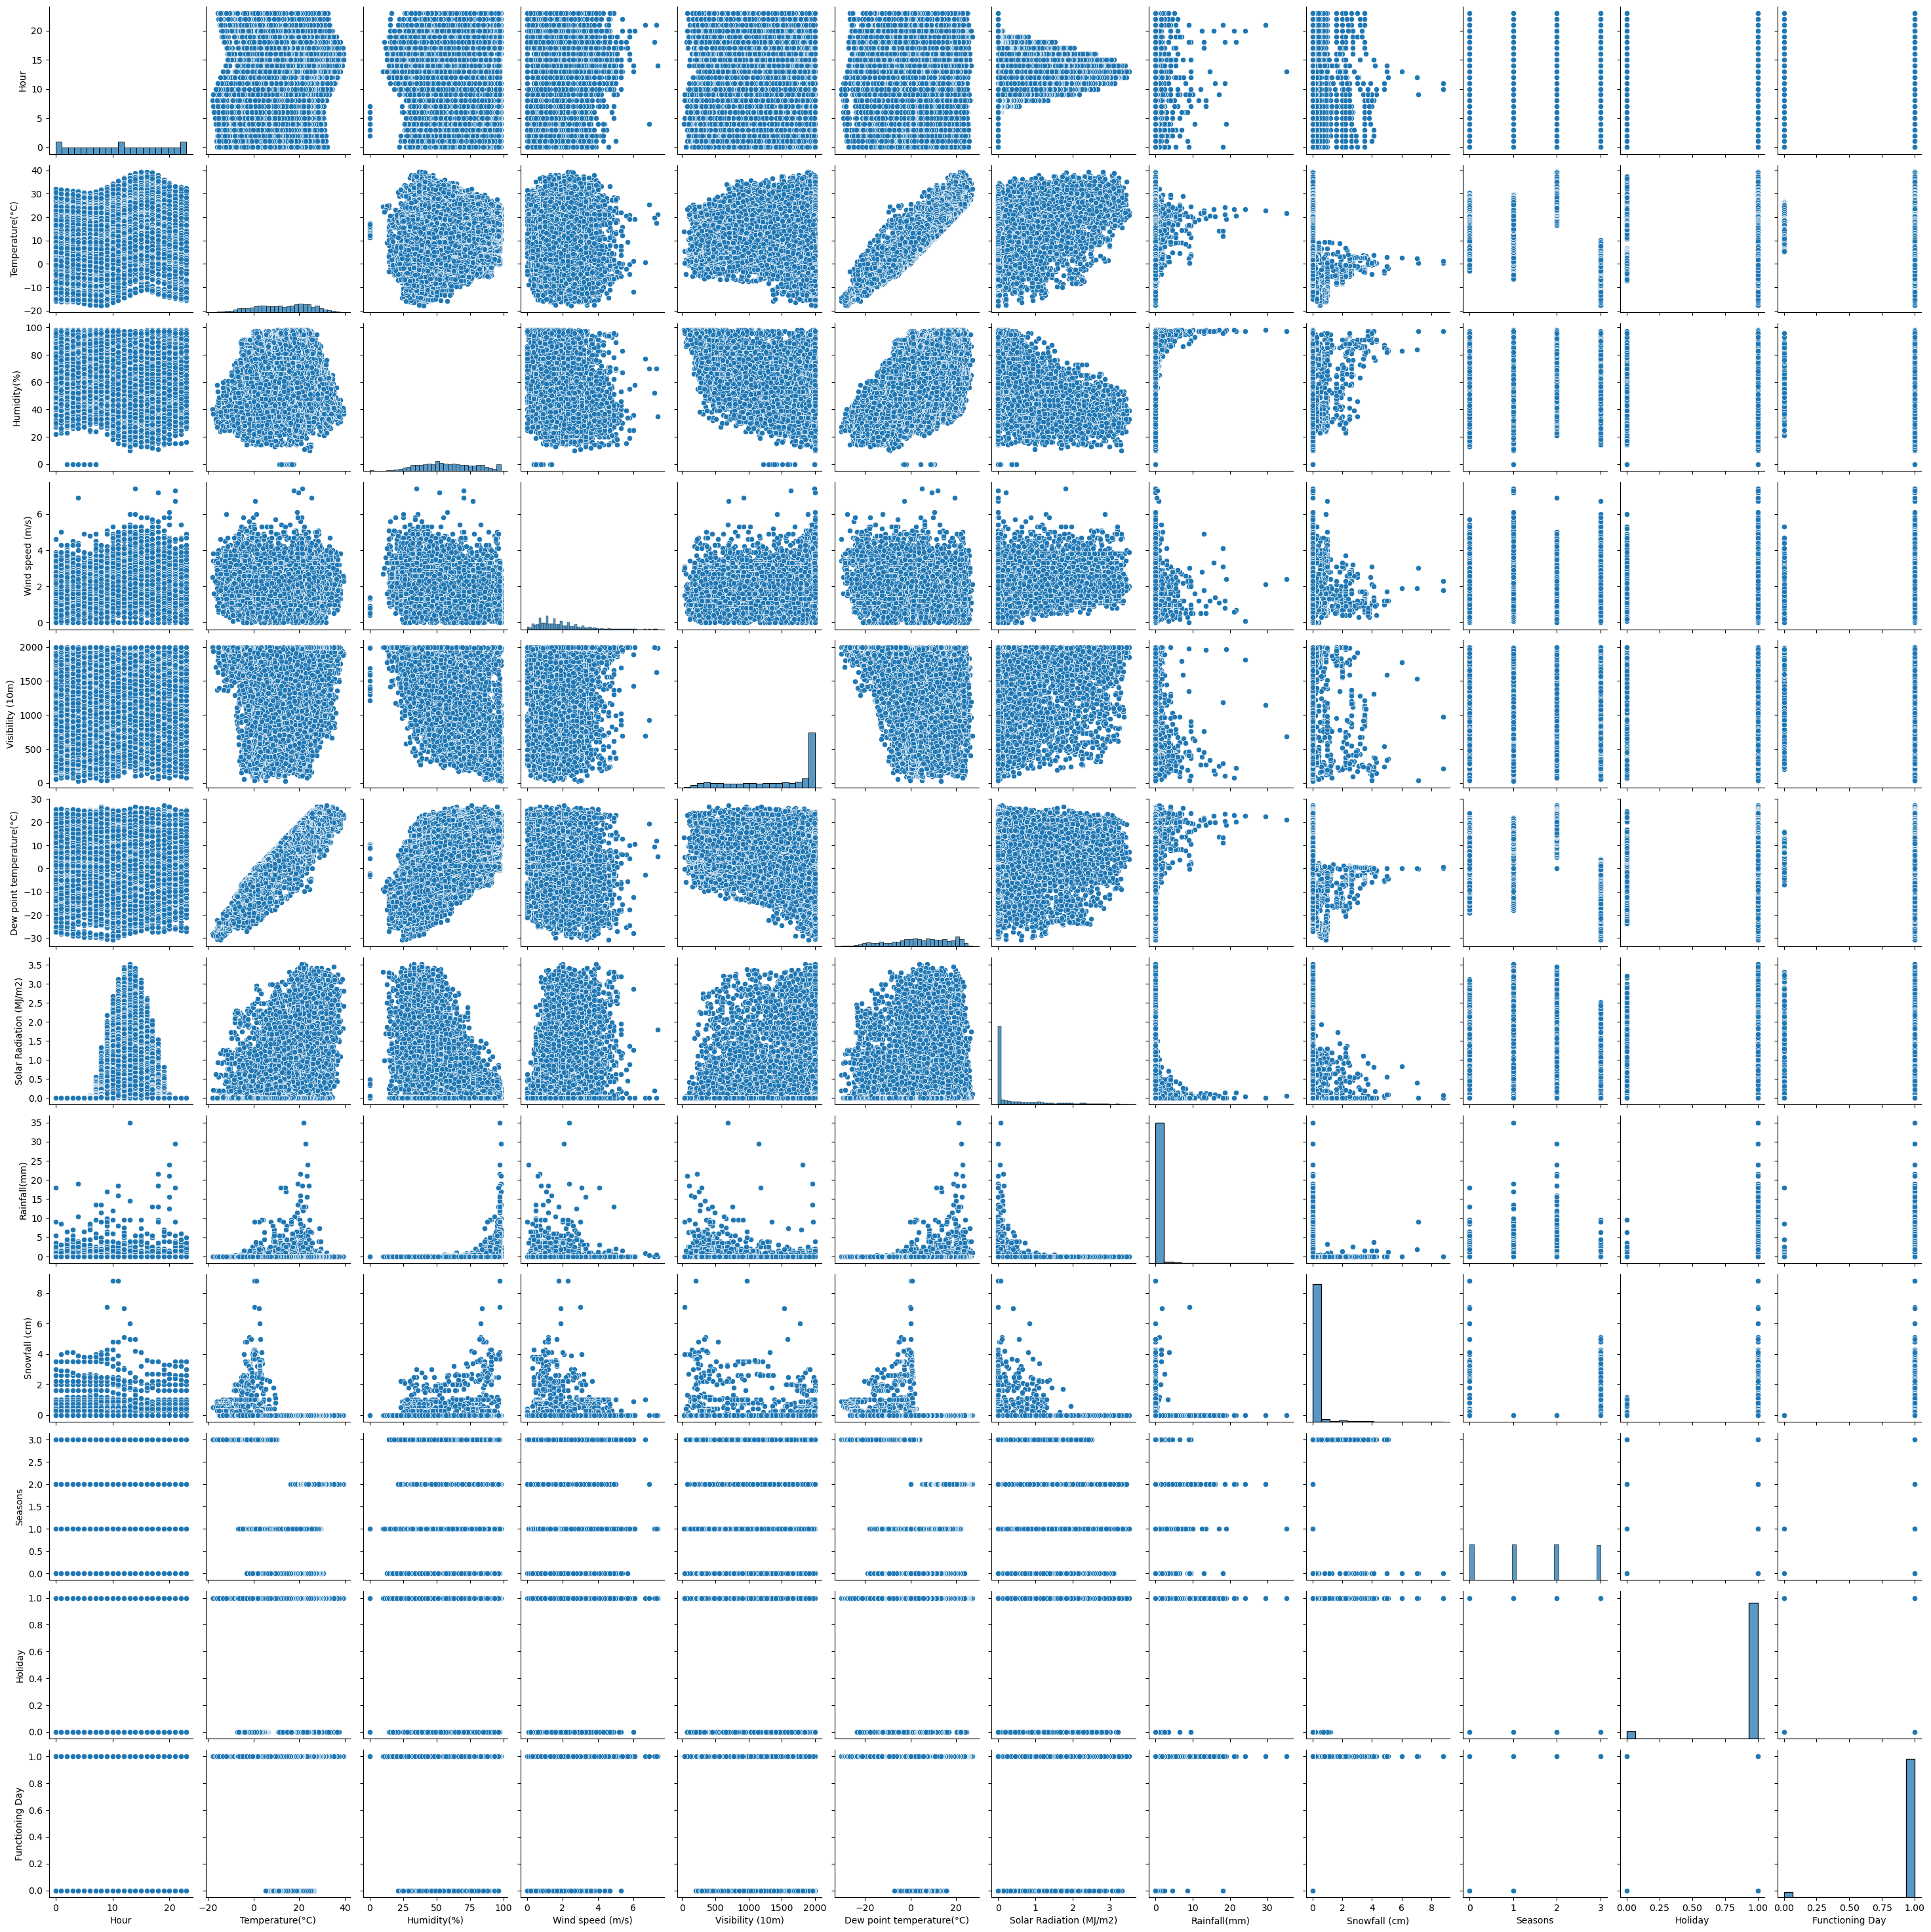

In [8]:
import matplotlib.pyplot as plt
# conda install -c conda-forge seaborn   (0.12.2 이상)
import seaborn as sns

sns.pairplot(bicycle_df.drop(columns='Rented Bike Count', axis=1))
plt.show()

In [9]:
import statsmodels.api as sm

model = sm.OLS(bicycle_df[['Rented Bike Count']], bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              2818.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -65610.
No. Observations:                8760   AIC:                                  1.312e+05
Df Residuals:                    8748   BIC:                                  1.313e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [10]:
bicycle_df = bicycle_df.drop(columns='Dew point temperature(°C)', axis=1)

In [11]:
import statsmodels.api as sm

model = sm.OLS(bicycle_df[['Rented Bike Count']], bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              3036.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -65654.
No. Observations:                8760   AIC:                                  1.313e+05
Df Residuals:                    8749   BIC:                                  1.314e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
print(feature_engineering_VIF(bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1)))

    vif_score                  feature
0    4.182308                     Hour
1    3.596720          Temperature(°C)
2   13.434638              Humidity(%)
3    4.742570         Wind speed (m/s)
4    7.095727         Visibility (10m)
5    2.486505  Solar Radiation (MJ/m2)
6    1.083303             Rainfall(mm)
7    1.127967            Snowfall (cm)
8    3.358084                  Seasons
9   17.052249                  Holiday
10  23.307042          Functioning Day


In [14]:
bicycle_df = bicycle_df.drop(columns='Functioning Day', axis=1)

In [15]:
import statsmodels.api as sm

model = sm.OLS(bicycle_df[['Rented Bike Count']], bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              2805.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -66249.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8750   BIC:                                  1.326e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [16]:
print(feature_engineering_VIF(bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1)))

   vif_score                  feature
0   4.084468                     Hour
1   3.574708          Temperature(°C)
2  10.297304              Humidity(%)
3   4.725575         Wind speed (m/s)
4   6.183682         Visibility (10m)
5   2.393706  Solar Radiation (MJ/m2)
6   1.081713             Rainfall(mm)
7   1.126836            Snowfall (cm)
8   3.021474                  Seasons
9  15.423590                  Holiday


In [17]:
bicycle_df = bicycle_df.drop(columns='Solar Radiation (MJ/m2)', axis=1)

In [18]:
import statsmodels.api as sm

model = sm.OLS(bicycle_df[['Rented Bike Count']], bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              3089.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -66279.
No. Observations:                8760   AIC:                                  1.326e+05
Df Residuals:                    8751   BIC:                                  1.326e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [19]:
print(feature_engineering_VIF(bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1)))

   vif_score           feature
0   4.079674              Hour
1   2.708877   Temperature(°C)
2   8.201153       Humidity(%)
3   4.187715  Wind speed (m/s)
4   6.178586  Visibility (10m)
5   1.081643      Rainfall(mm)
6   1.118791     Snowfall (cm)
7   3.007564           Seasons
8  14.617067           Holiday


In [20]:
bicycle_df = bicycle_df.drop(columns='Humidity(%)', axis=1)

In [21]:
import statsmodels.api as sm

model = sm.OLS(bicycle_df[['Rented Bike Count']], bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1))
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              3316.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:49:34   Log-Likelihood:                         -66435.
No. Observations:                8760   AIC:                                  1.329e+05
Df Residuals:                    8752   BIC:                                  1.329e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [22]:
print(feature_engineering_VIF(bicycle_df.drop(columns=['Rented Bike Count', 'Date'], axis=1)))

   vif_score           feature
0   4.075906              Hour
1   2.461120   Temperature(°C)
2   4.169055  Wind speed (m/s)
3   6.024969  Visibility (10m)
4   1.044923      Rainfall(mm)
5   1.097702     Snowfall (cm)
6   2.919526           Seasons
7   8.253788           Holiday
